In [2]:
import pandas as pd 
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [3]:
#https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [4]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

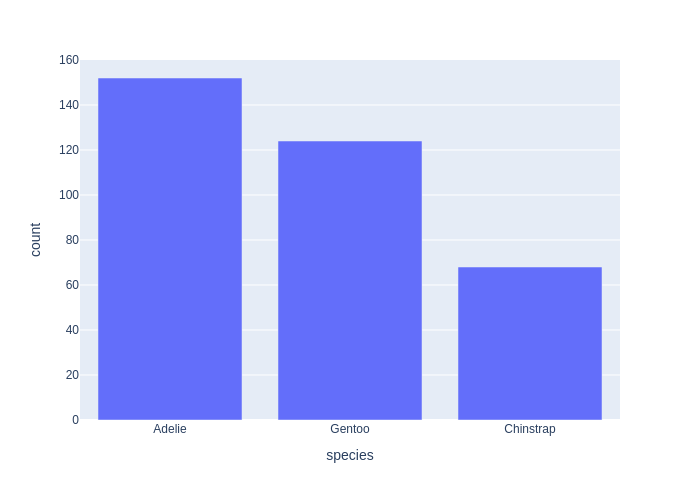

In [5]:
import plotly.express as px
fig = px.bar(penguins.species.value_counts().reset_index(), x='species', y='count')
fig.show(renderer="png")

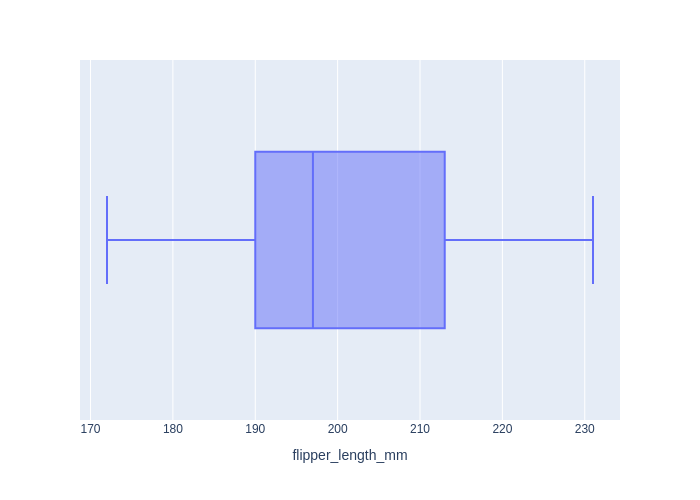

In [6]:
fig = px.box(penguins, x="flipper_length_mm")
fig.show(renderer="png") 

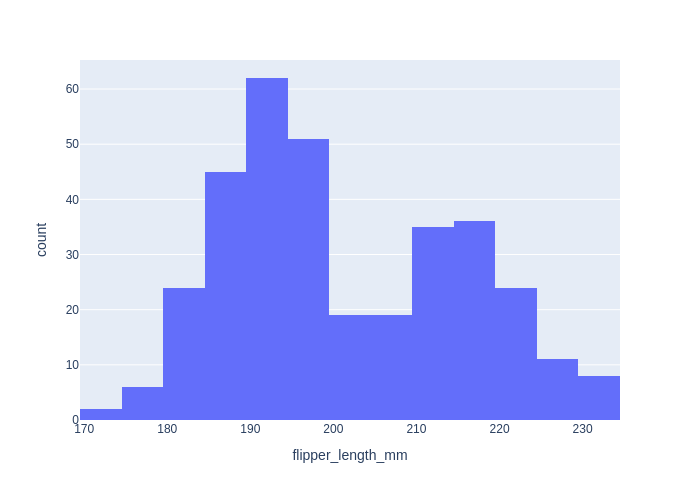

In [7]:
fig = px.histogram(penguins, x="flipper_length_mm")
fig.show(renderer="png")

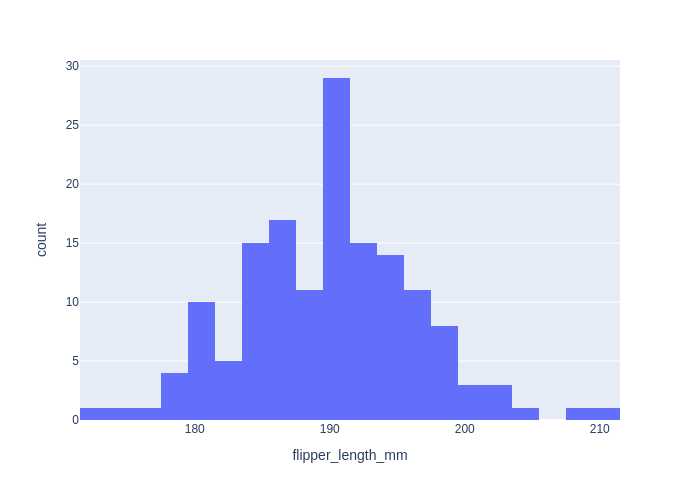

In [8]:
filtered_penguins = penguins[penguins["species"] == "Adelie"]
fig = px.histogram(filtered_penguins, x="flipper_length_mm")
fig.show(renderer="png")

### 1. Use fig.add_[h/v]line() and fig.add_[h/v]rect() to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

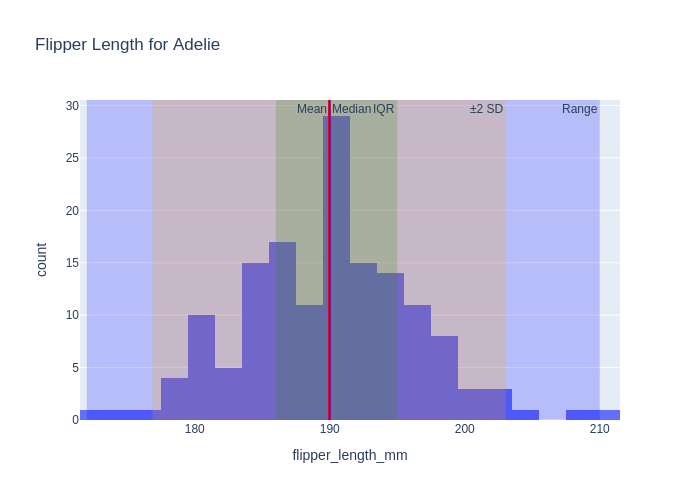

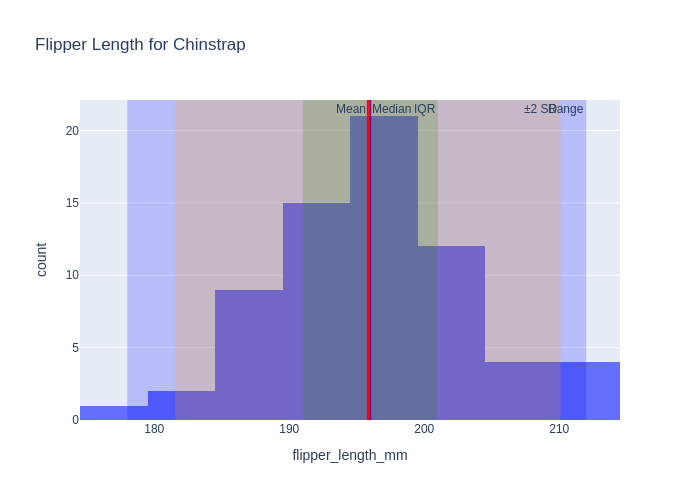

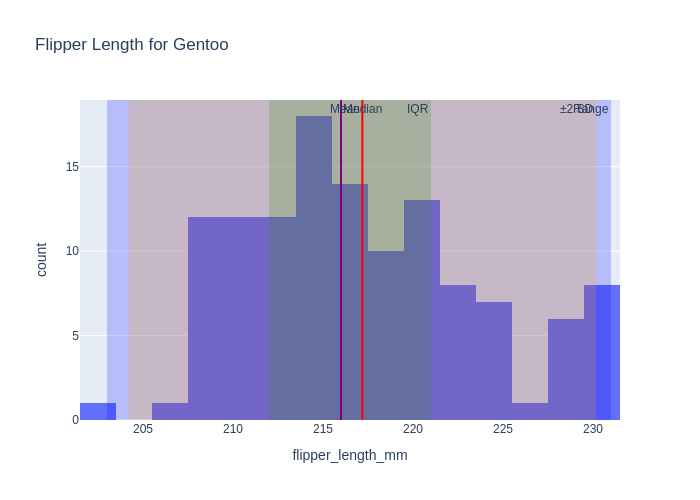

In [9]:
#this is what ChatBot came up with: I personally don't find it super easy to look at 
#but replacing vrect with vline in a couple places could help w that

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load the penguins dataset (assuming it's already loaded in the variable `penguins`).
# If you don't have it loaded, you can use seaborn's version:
# penguins = sns.load_dataset("penguins").dropna()

# List of species in the dataset
species_list = penguins["species"].unique()

# Loop over each species
for species in species_list:
    # Filter the dataset by species
    filtered_penguins = penguins[penguins["species"] == species]
    
    # Create the histogram for flipper_length_mm
    fig = px.histogram(filtered_penguins, x="flipper_length_mm", title=f"Flipper Length for {species}")
    
    # Calculate statistics
    mean_value = filtered_penguins["flipper_length_mm"].mean()
    median_value = filtered_penguins["flipper_length_mm"].median()
    min_value = filtered_penguins["flipper_length_mm"].min()
    max_value = filtered_penguins["flipper_length_mm"].max()
    std_value = filtered_penguins["flipper_length_mm"].std()
    q1 = filtered_penguins["flipper_length_mm"].quantile(0.25)
    q3 = filtered_penguins["flipper_length_mm"].quantile(0.75)
    
    # Range: min to max
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="blue", opacity=0.2, line_width=0, annotation_text="Range")
    
    # IQR: Q1 to Q3
    fig.add_vrect(x0=q1, x1=q3, fillcolor="green", opacity=0.2, line_width=0, annotation_text="IQR")
    
    # ±2 standard deviations around the mean
    lower_bound = mean_value - 2 * std_value
    upper_bound = mean_value + 2 * std_value
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="orange", opacity=0.2, line_width=0, annotation_text="±2 SD")

    # Mean line
    fig.add_vline(x=mean_value, line=dict(color="red", width=2), annotation_text="Mean", annotation_position="top left")
    
    # Median line
    fig.add_vline(x=median_value, line=dict(color="purple", width=2), annotation_text="Median", annotation_position="top right")
    
    # Show the plot
    fig.show(renderer="png")


### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

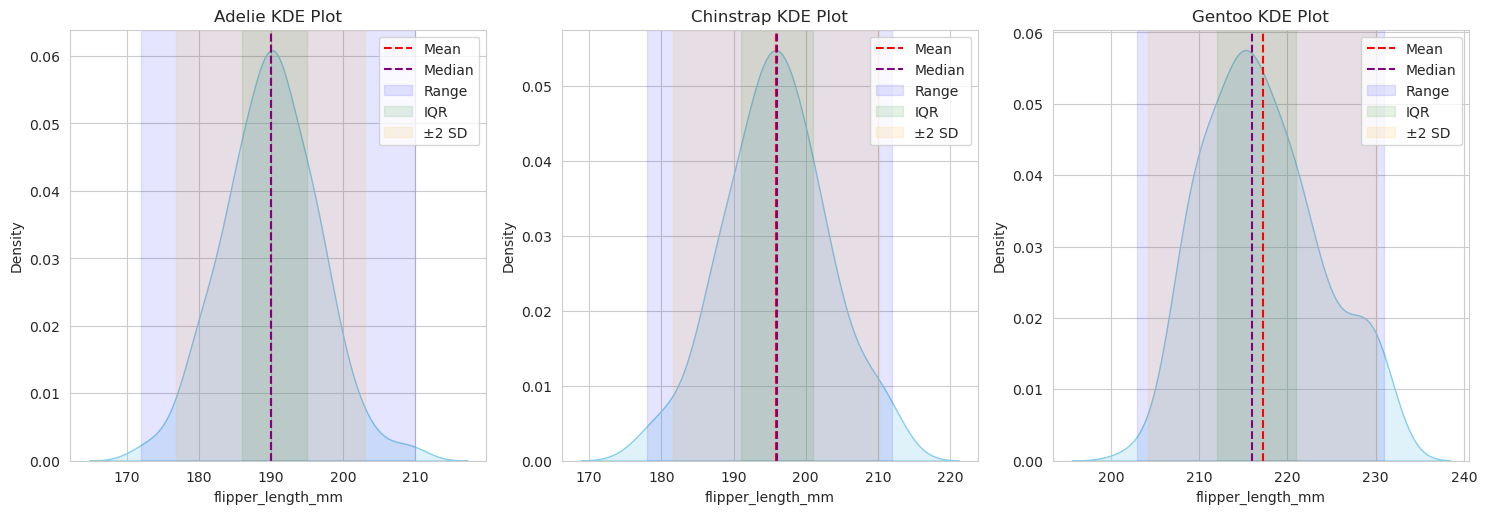

In [15]:
#code from the ChatBot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset (or load your version if already present)
# penguins = sns.load_dataset("penguins").dropna()

# List of species in the dataset
species_list = penguins["species"].unique()

# Set up the plot grid - 3 plots per row
fig, axes = plt.subplots(nrows=(len(species_list) // 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Loop over each species to create individual KDE plots
for i, species in enumerate(species_list):
    # Filter the dataset by species
    filtered_penguins = penguins[penguins["species"] == species]
    
    # Calculate statistics
    mean_value = filtered_penguins["flipper_length_mm"].mean()
    median_value = filtered_penguins["flipper_length_mm"].median()
    min_value = filtered_penguins["flipper_length_mm"].min()
    max_value = filtered_penguins["flipper_length_mm"].max()
    std_value = filtered_penguins["flipper_length_mm"].std()
    q1 = filtered_penguins["flipper_length_mm"].quantile(0.25)
    q3 = filtered_penguins["flipper_length_mm"].quantile(0.75)
    
    # ±2 standard deviations
    lower_bound = mean_value - 2 * std_value
    upper_bound = mean_value + 2 * std_value
    
    # Create the KDE plot
    sns.kdeplot(filtered_penguins["flipper_length_mm"], ax=axes[i], fill=True, color="skyblue")
    
    # Set title for each plot
    axes[i].set_title(f"{species} KDE Plot")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_value, color="red", linestyle="--", label="Mean")
    axes[i].axvline(median_value, color="purple", linestyle="--", label="Median")
    
    # Add shaded areas for range, IQR, and ±2 standard deviations
    axes[i].axvspan(min_value, max_value, color="blue", alpha=0.1, label="Range")
    axes[i].axvspan(q1, q3, color="green", alpha=0.1, label="IQR")
    axes[i].axvspan(lower_bound, upper_bound, color="orange", alpha=0.1, label="±2 SD")
    
    # Add legend
    axes[i].legend(loc="upper right")

# Adjust layout
plt.tight_layout()

# Remove extra subplots if species count is less than 9
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


*The above graphs are what the ChatBot initially gave me. The below are what I got after working with the bot for a little bit in an attempt to make more visually appealing graphs.*

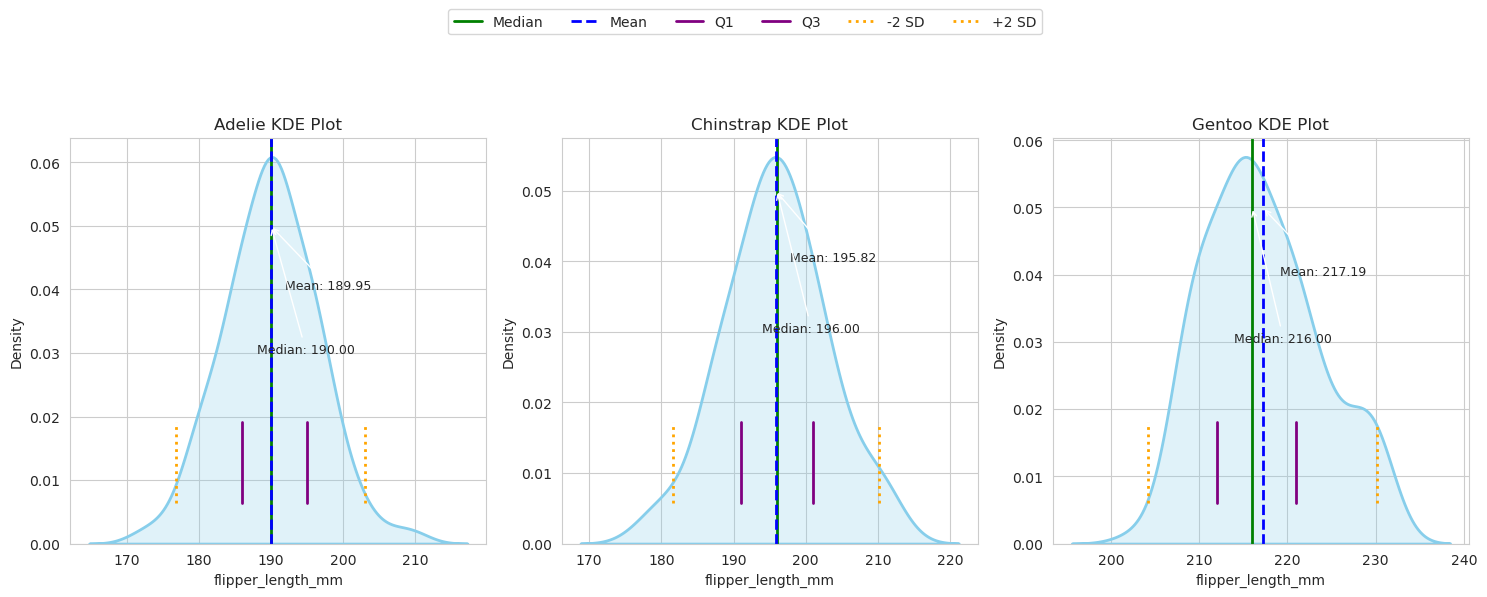

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset (assuming it's already loaded in the variable `penguins`)
# penguins = sns.load_dataset("penguins").dropna()

# List of species in the dataset
species_list = penguins["species"].unique()

# Set up the plot grid - 3 plots per row
fig, axes = plt.subplots(nrows=(len(species_list) // 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Define colors and transparency levels
mean_line_color = "blue"   # Change mean color to blue
median_line_color = "green" # Change median color to green
iqr_line_color = "purple"
std_line_color = "orange"
line_width = 2
offset_threshold = 3  # Threshold to define when mean and median are 'close'

# Loop over each species to create individual KDE plots
for i, species in enumerate(species_list):
    # Filter the dataset by species
    filtered_penguins = penguins[penguins["species"] == species]
    
    # Calculate statistics
    mean_value = filtered_penguins["flipper_length_mm"].mean()
    median_value = filtered_penguins["flipper_length_mm"].median()
    min_value = filtered_penguins["flipper_length_mm"].min()
    max_value = filtered_penguins["flipper_length_mm"].max()
    std_value = filtered_penguins["flipper_length_mm"].std()
    q1 = filtered_penguins["flipper_length_mm"].quantile(0.25)
    q3 = filtered_penguins["flipper_length_mm"].quantile(0.75)
    
    # ±2 standard deviations
    lower_bound = mean_value - 2 * std_value
    upper_bound = mean_value + 2 * std_value
    
    # Create the KDE plot
    sns.kdeplot(filtered_penguins["flipper_length_mm"], ax=axes[i], fill=True, color="skyblue", linewidth=2)
    
    # Set title for each plot
    axes[i].set_title(f"{species} KDE Plot")
    
    # Add vertical lines for median first (solid) and then mean (dashed) on top
    axes[i].axvline(median_value, color=median_line_color, linestyle="-", linewidth=line_width, label="Median")
    axes[i].axvline(mean_value, color=mean_line_color, linestyle="--", linewidth=line_width, label="Mean")
    
    # Add short lines for Q1, Q3
    axes[i].axvline(q1, color=iqr_line_color, linestyle="-", linewidth=line_width, ymin=0.1, ymax=0.3, label="Q1")
    axes[i].axvline(q3, color=iqr_line_color, linestyle="-", linewidth=line_width, ymin=0.1, ymax=0.3, label="Q3")
    
    # Add short lines for ±2 standard deviations
    axes[i].axvline(lower_bound, color=std_line_color, linestyle=":", linewidth=line_width, ymin=0.1, ymax=0.3, label="-2 SD")
    axes[i].axvline(upper_bound, color=std_line_color, linestyle=":", linewidth=line_width, ymin=0.1, ymax=0.3, label="+2 SD")
    
    # Annotate mean and median for clarity
    mean_annotation = f"Mean: {mean_value:.2f}"
    median_annotation = f"Median: {median_value:.2f}"
    
    # Offset the annotations if mean and median are close to each other
    if abs(mean_value - median_value) < offset_threshold:
        # Place median slightly to the left if they're close, but ensure both stay close to the graph
        axes[i].annotate(mean_annotation, xy=(mean_value, 0.05), xytext=(mean_value + 2, 0.04),
                         arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=9)
        axes[i].annotate(median_annotation, xy=(median_value, 0.05), xytext=(median_value - 2, 0.03),
                         arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=9)
    else:
        # Place both annotations on the same side if they're not close
        axes[i].annotate(mean_annotation, xy=(mean_value, 0.05), xytext=(mean_value + 3, 0.04),
                         arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=9)
        axes[i].annotate(median_annotation, xy=(median_value, 0.05), xytext=(median_value + 3, 0.03),
                         arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=9)

# Set a global legend outside the plot grid to reduce clutter
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=6, bbox_to_anchor=(0.5, 1.05), fontsize=10)

# Adjust layout to increase spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at the top for the global legend

# Remove extra subplots if species count is less than 9
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


### 3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

My personal preference between the 3 data visualization methods is the Kernel Density Estimator as I feel that it makes it significantly easier to understand data at a glance, while not sacrificing much in terms of comparability. What makes a boxplot weak is that it can not express the frequency of data points or visualize the shape of the data for you, but a KDE does not struggle with this. Histograms, on the other hand, are able to express the shape of data, but they are hard to compare side by side and the bin size plays a big part in how the data looks. KDEs dont struggle with either of those problems, as you can either compare them stacked or side by side with a great deal of insight. While KDEs can be potentially swayed or manipulated by the choice of bandwidth, I feel that they are able to provide the most helpful information in a visual context. If you are trying to dive deeper into the data, I think that a boxplot could be very useful in a lot of situations, but I personally would be very likely to pick a KDE over one. Additionally, when I visualize data in my head, it is almost always as a distribution similar to how a KDE looks, meaning that at a glance I can understand what I am looking at with them, which is another reason that I find them to be more useful and natural for me.

### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

**Which datasets have similar means and similar variances**

Distributions A and C below. A has quite a large variance because the data is scattered pretty evenly, while C has a large variance because its data is split into 2 modes. They will also have quite similar means because A is evenly spread among the graph and so will have a mean in the center (around 5ish), while C while have a mean in the center because it has 2 peaks on either side of the center.

**Which datasets have similar means but quite different variances**

Distributions B and C below. B represents a pretty normal distribution centered around about 5, while C has 2 peaks that straddle the same place. As a result, the means should be pretty similar, but the variance of C will be much larger than B.

**Which datasets have similar variances but quite different means**

The best answer to fit this description is B and D. Both datasets have pretty tight spreads, and as a result will have low variances. The means are different, as D is offset to the right and will probably have a mean of about 6.

**Which datasets have quite different means and quite different variances**
D and A make the most sense here. D has a very tight spread, while A has the opposite as it is spread across the whole histogram. Given that A's mean will probably be right around the center at 5, and D will be more about 6, that would qualify them as different means.



*Follow-up: I ran a code from the ChatBot to get statistical values after I finished, and it mostly backed me up. I don't know if I would consider any of the differences in mean to be "quite different" but I think those answers should be right*

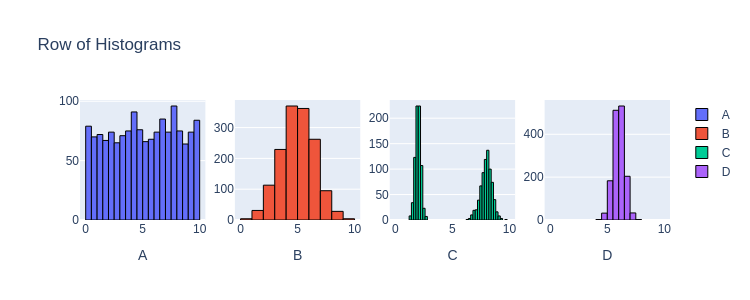

In [22]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [23]:
import numpy as np

# Datasets from your example
n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate means
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)
mean4 = np.mean(data4)

# Calculate variances
var1 = np.var(data1)
var2 = np.var(data2)
var3 = np.var(data3)
var4 = np.var(data4)

# Print the results
print(f"Data1 - Mean: {mean1:.2f}, Variance: {var1:.2f}")
print(f"Data2 - Mean: {mean2:.2f}, Variance: {var2:.2f}")
print(f"Data3 - Mean: {mean3:.2f}, Variance: {var3:.2f}")
print(f"Data4 - Mean: {mean4:.2f}, Variance: {var4:.2f}")


Data1 - Mean: 4.88, Variance: 8.68
Data2 - Mean: 5.00, Variance: 2.38
Data3 - Mean: 5.02, Variance: 9.25
Data4 - Mean: 6.00, Variance: 0.26


### 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

The mean is the arithmetic average of a dataset; it is found by summing all the values in a dataset and the dividing them by the total count of values. A median on the other hand is the middle data point of an ordered dataset, or the average of the two middle points if there is an even number of datapoints. On the below graph we can look at skew.

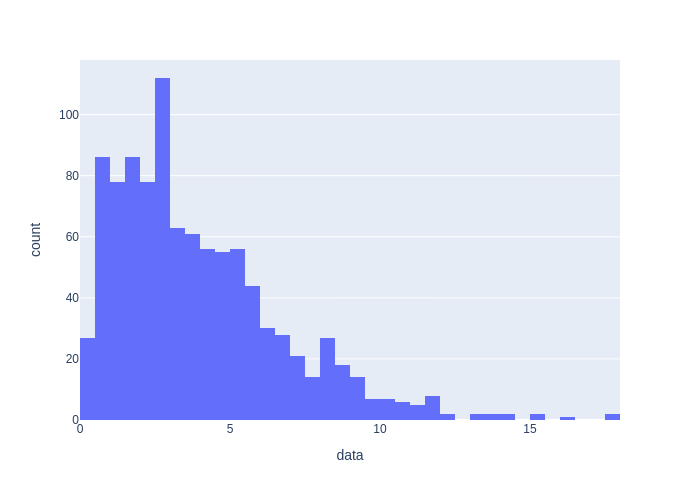

In [27]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

Skew is the way that a distribution is assymetrical. A graph that is skewed to the left has a longer tail on the left than on the right; in other words, the left side of the distribution has a more gradual decline. The above graph would be considered right skew because the right tail is longer and declines more gradually than the left. When a graph is skewed right, the mean is larger than the median because the larger datapoints on the longer tail weight more heavily in an arithmetic average. The opposite is true for a left skew distribution. We can see this below.

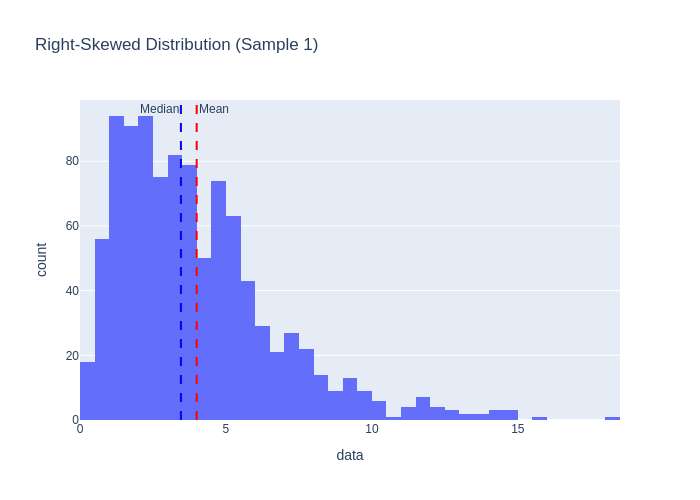

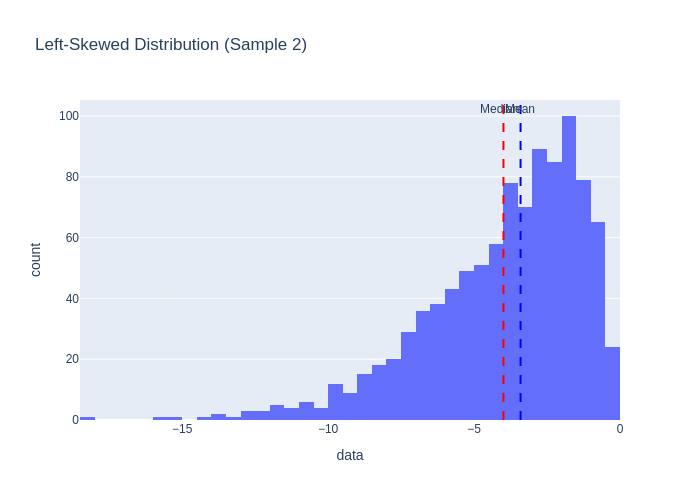

In [28]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a right-skewed sample
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a DataFrame for sample1
df_sample1 = pd.DataFrame({'data': sample1})

# Calculate mean and median for sample1
mean1 = df_sample1['data'].mean()
median1 = np.quantile(df_sample1['data'], [0.5])[0]

# Plot histogram for sample1
fig1 = px.histogram(df_sample1, x="data", title="Right-Skewed Distribution (Sample 1)")
fig1.add_vline(mean1, line_color='red', line_dash='dash', 
                annotation_text='Mean', annotation_position='top right')
fig1.add_vline(median1, line_color='blue', line_dash='dash', 
                annotation_text='Median', annotation_position='top left')

# Generate a left-skewed sample
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a DataFrame for sample2
df_sample2 = pd.DataFrame({'data': sample2})

# Calculate mean and median for sample2
mean2 = df_sample2['data'].mean()
median2 = np.quantile(df_sample2['data'], [0.5])[0]

# Plot histogram for sample2
fig2 = px.histogram(df_sample2, x="data", title="Left-Skewed Distribution (Sample 2)")
fig2.add_vline(mean2, line_color='red', line_dash='dash', 
                annotation_text='Mean', annotation_position='top right')
fig2.add_vline(median2, line_color='blue', line_dash='dash', 
                annotation_text='Median', annotation_position='top left')

# Show the plots
fig1.show(renderer="png")
fig2.show(renderer="png")


The above is a code that I had a chatbot create in order to demonstrate the differences between a left and right skew in terms of their effect on the median and mean. As we can see, the longer tail pulls the mean to its side due to having more extreme values which are weighted heavily in an arithmetic average. 
TLDR: Left skew means mean < median, right skew means mean > median

### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [60]:
import pandas as pd

# Load a specific TidyTuesday dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_rosters.csv'  # Replace with actual dataset URL
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

  team_code    season position_type  player_id  \
0       ATL  19992000      forwards    8467867   
1       ATL  19992000      forwards    8445176   
2       ATL  19992000      forwards    8460014   
3       ATL  19992000      forwards    8460510   
4       ATL  19992000      forwards    8459596   

                                            headshot first_name  last_name  \
0  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Bryan      Adams   
1  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Donald    Audette   
2  https://assets.nhle.com/mugs/nhl/19992000/ATL/...       Eric   Bertrand   
3  https://assets.nhle.com/mugs/nhl/19992000/ATL/...      Jason  Botterill   
4  https://assets.nhle.com/mugs/nhl/19992000/ATL/...     Andrew   Brunette   

   sweater_number position_code shoots_catches  height_in_inches  \
0            26.0             L              L              72.0   
1            28.0             R              R              68.0   
2            83.0         

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54883 entries, 0 to 54882
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_code              54883 non-null  object 
 1   season                 54883 non-null  int64  
 2   position_type          54883 non-null  object 
 3   player_id              54883 non-null  int64  
 4   headshot               54883 non-null  object 
 5   first_name             54883 non-null  object 
 6   last_name              54883 non-null  object 
 7   sweater_number         54734 non-null  float64
 8   position_code          54883 non-null  object 
 9   shoots_catches         54598 non-null  object 
 10  height_in_inches       54855 non-null  float64
 11  weight_in_pounds       54858 non-null  float64
 12  height_in_centimeters  54855 non-null  float64
 13  weight_in_kilograms    54858 non-null  float64
 14  birth_date             54883 non-null  object 
 15  bi

In [62]:
df.isna().sum()

team_code                   0
season                      0
position_type               0
player_id                   0
headshot                    0
first_name                  0
last_name                   0
sweater_number            149
position_code               0
shoots_catches            285
height_in_inches           28
weight_in_pounds           25
height_in_centimeters      28
weight_in_kilograms        25
birth_date                  0
birth_city                  0
birth_country               0
birth_state_province     9571
dtype: int64

I want to see the distribution of players heights and weights, as well as jersey number because that will be fun to see. First I want to get rid of birth_state_province_ and shoots_catches because they are not super helpful to us. Then we will clear out any player that is missing data.

In [63]:
del df['birth_state_province']
del df['shoots_catches']

In [64]:
df = df.dropna()

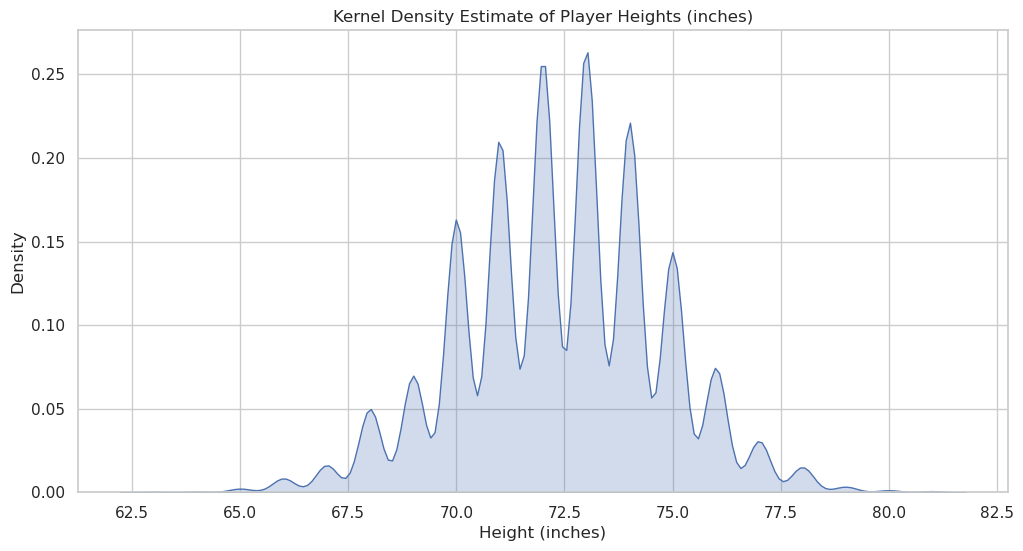

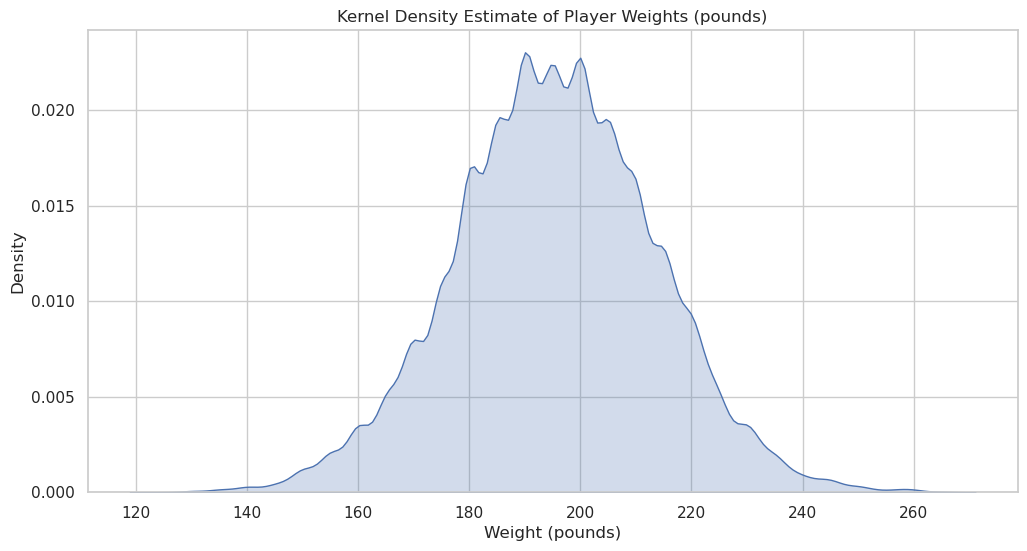

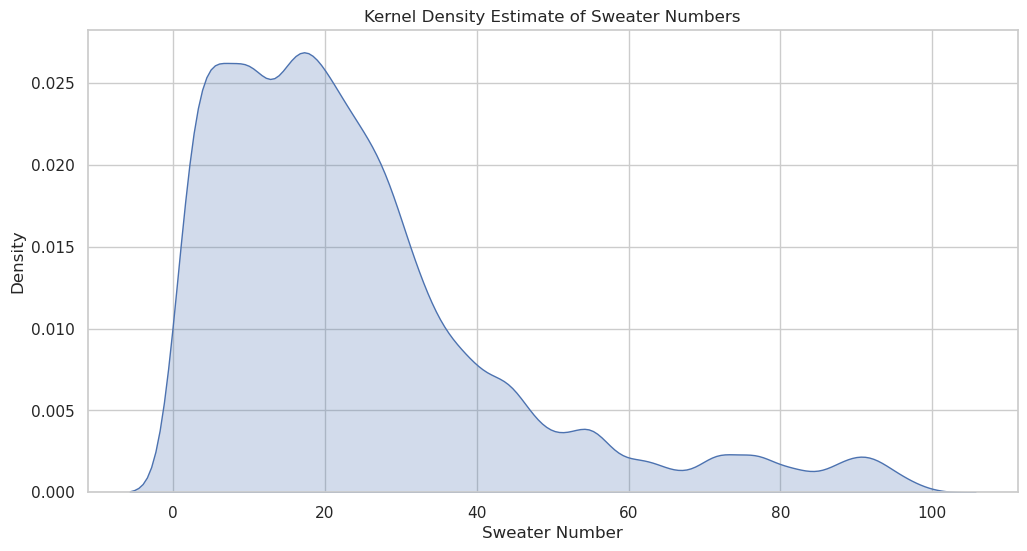

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create KDE plot for player heights
plt.figure(figsize=(12, 6))
sns.kdeplot(df['height_in_inches'], fill=True)
plt.title('Kernel Density Estimate of Player Heights (inches)')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.show()

# Create KDE plot for player weights
plt.figure(figsize=(12, 6))
sns.kdeplot(df['weight_in_pounds'], fill=True)
plt.title('Kernel Density Estimate of Player Weights (pounds)')
plt.xlabel('Weight (pounds)')
plt.ylabel('Density')
plt.show()

# Create KDE plot for sweater numbers
plt.figure(figsize=(12, 6))
sns.kdeplot(df['sweater_number'], fill=True)
plt.title('Kernel Density Estimate of Sweater Numbers')
plt.xlabel('Sweater Number')
plt.ylabel('Density')
plt.show()


Analyzing the three above graphs from the dataset of NHL players, we can identify some interesting trends. First in the actual data itself, we had to remove a few points from the dataset to address missingness, but for the most part the dataset was very complete. Let's analyze each graph

**Height**

I'm not sure why this graph is so bumpy, it is probably due to the KDE not smoothing it enough, and the way in which the data was collected (maybe the NHL only measures heights in centimeters, so they don't translate well to inches). If the jaggedness of the data is ignored as a likely result of the way that the NHL measures heights, we are left with a quite symmetrical and simple distribution. In fact, it is surprising how evenly distributed this graph is. There is one mode, no real skew, and no super notable anomalies beyond the jaggedness of the datapoints.

**Weight**

This graph is even more normal looking than the one for heights, as it is much smoother and less jagged. The graph is symmetrical, looks pretty normal, and has one mode. This is quite a normal looking distribution, but it is interesting to look at the average height/weight of a player together. The average height of a player is sitting at just about 6 foot even, and the average weight is about 195 lbs. Mitch Marner, my favorite player on the Leafs, seems to be an outlier in this regard, as he is 6 foot, but only 180 lbs. Maybe if he got a bit bigger, he could help the Leafs in the playoffs for once.

**Jersey Number**

This one is really just for fun, and it highlights a few shortcomings of the KDE. For example, the distribution claims that there are jersey numbers in use that are 0 or lower, and that there a few that are 100 or higher. Sadly, this is not true. Beyond that, this graph shows us that the low numbers are in use very frequently but then are much less frequent from about 20 onward. This makes sense, as historically the low numbers on a team are all filled, especially by defensemen and goalies. This graph also shows a good example of skewness, as it is strongly skewed to the right, which means that the median jersey number will be lower than the mean. Fun stuff.

### 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

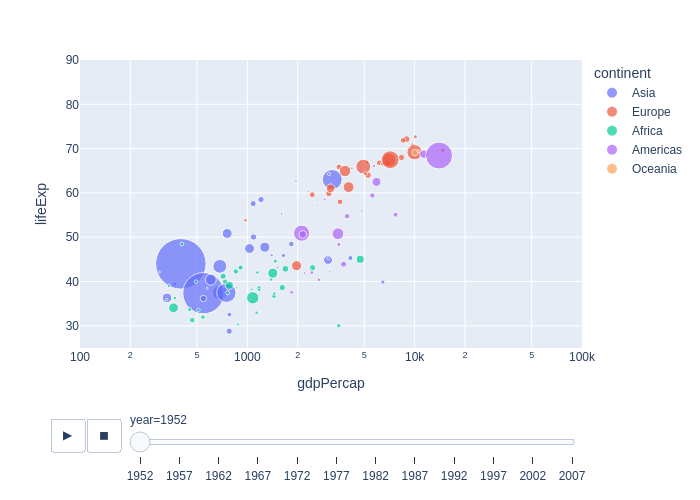

In [89]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png") #(I used renderer="iframe" first to look at it)

### 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005]) and remove the log_x=True and range_y parameters

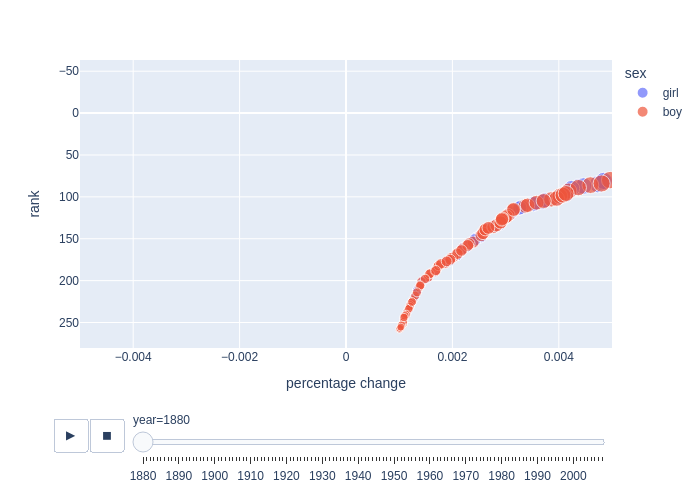

In [87]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percentage change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS (I used renderer="iframe" first to look at it)

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes sir 

**ChatBot Summary 1:**

Here's a summary of our interactions:

---

### **1. Plotly Histograms with Penguin Data**
You asked how to modify a Plotly histogram to show data for specific species from the penguins dataset. We discussed how to filter the data by species and add lines and rectangles to mark statistical points like the mean, median, interquartile range (IQR), and standard deviations.

### **2. Seaborn KDEs with Statistical Lines**
We transitioned from Plotly to Seaborn for Kernel Density Estimators (KDEs) and discussed how to add lines for the mean, median, IQR, and standard deviations on top of KDE plots. You wanted the lines to be more visually distinct, with short lines for Q1, Q3, and standard deviations, while also avoiding visual clutter. We adjusted line styles, colors, and labels to make the plots more readable.

### **3. Comparison of Boxplots, Histograms, and KDEs**
We then discussed the strengths and weaknesses of different data visualization techniques, including:
   - **Boxplots**: Good for summarizing range and outliers but less effective at showing distribution shapes.
   - **Histograms**: Great for showing frequency distributions but dependent on bin size and not ideal for precise statistical insights.
   - **KDEs**: Useful for highlighting distribution trends and modes but can obscure key data points like the median or IQR.

### **4. Plotly Subplots for Histograms**
You provided a Plotly code example with subplots of histograms for four different datasets. We discussed how to ensure consistency with binning and improve labeling and layout for clearer visual interpretation. I suggested better binning practices and label descriptions for clarity.

### **5. Calculating Means and Variances for Datasets**
Finally, you asked how to calculate the **mean** and **variance** for the datasets. I explained how to use NumPy functions (`np.mean()` and `np.var()`) to compute these statistics for each dataset and provided code to calculate and print the results.

---

This summary captures the key points and technical aspects of our interactions, including improvements and solutions for the visualizations and statistical calculations.

https://chatgpt.com/share/66f4b47f-0818-8013-bb31-0b9d121cf6d9

**ChatBot Summary 2:**

Certainly! Here’s a summary of our exchanges:

---

### Summary of Interactions

1. **Definitions Verification**:
   - You provided definitions for mean, median, skewness, and their relationships in skewed distributions. I confirmed the accuracy of your definitions and clarified any potential misconceptions.

2. **Data Visualization Code**:
   - You shared code to generate a dataset using `scipy` and `pandas`, and I assisted in displaying concepts like mean and median using the provided code. I suggested using seaborn for kernel density estimators to visualize distributions for player heights, weights, and sweater numbers.

3. **Data Cleaning Issues**:
   - You encountered a `KeyError` when trying to delete specific columns from your DataFrame. I provided troubleshooting steps to check for existing column names and suggested using error handling methods to avoid deleting non-existent columns.

4. **KDE Plots**:
   - After confirming the correct column names in your dataset, I provided a code example to generate kernel density estimation (KDE) plots for player heights, weights, and sweater numbers using seaborn.

5. **Plotly Scatter Plot**:
   - You ran code to create a scatter plot using Plotly, but only received a white screen. I offered solutions to ensure that the figure displays correctly, such as specifying renderers and checking the execution environment.

6. **Modified Scatter Plot**:
   - You requested a modified version of the Plotly scatter plot, changing the x, y, size, color, animation_frame, animation_group, and hover_name parameters. I provided the updated code to create this scatter plot according to your specifications.

---

If you need any additional details or clarifications, feel free to ask!

https://chatgpt.com/share/66f4c88d-5030-8013-b140-7850c5a691d1